In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

## About the dataset

This dataset contains information about several profile types from each group.
Main profile types:
* Perfil de integrantes 
* Perfil de colaboración 
* Perfil de productos resultado de actividades de generación de nuevo conocimiento 
* Perfil de productos resultado de actividades de Desarrollo Tecnológico e Innovación 
* Perfil de productos resultado de actividades de Apropiación Social del Conocimiento 
* Perfil de productos resultado de actividades relacionadas con la Formación del Recurso Humano en CTI 

In [3]:
df = pd.read_csv('./dataset.csv')
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea,classification,code
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,...,0.00,0.91,0.67,3.36,1.82,0.00,0.0,Ingeniería y Tecnología,C,COL0033023
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,...,0.00,0.00,1.09,1.82,1.82,0.00,0.0,Ciencias Naturales,C,COL0040519
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.00,1.68,0.00,0.00,3.36,3.28,0.0,Ciencias Médicas y de la Salud,A,COL0120245
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.36,0.00,0.36,0.00,0.00,1.82,0.0,Ingeniería y Tecnología,A,COL0110982
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,0.00,0.00,3.82,8.85,4.76,0.00,0.0,Ingeniería y Tecnología,B,COL0165935


## Distribution by knowledge area

In [4]:
examples, _ = df.shape
print('Total example: ', examples)

Total example:  5198


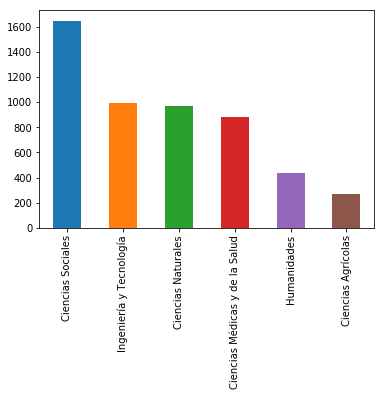

In [5]:
df['knowledgeArea'].value_counts().plot.bar()

# Let's analyse data for knowledge area: Ciencias Naturales

In [123]:
knowledge_area = 'Ciencias Naturales'
#r = df[df['knowledgeArea'] == knowledge_area].drop(columns=['knowledgeArea', 'classification', 'code'])
filtered = df[df['knowledgeArea'] == knowledge_area]
X = filtered.drop(columns=['knowledgeArea', 'classification', 'code'])
y = filtered['classification']

In [138]:
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
1,-0.666418,-0.775621,-1.101576,-0.733349,-0.685711,-0.246779,-0.513809,-0.013267,0.993800,0.247891,...,-1.205613,0.655512,-0.480286,-0.876216,-1.093035,-0.336522,2.527908,0.585715,-0.571750,-0.133995
16,-0.666418,0.138537,-0.572077,0.292388,-0.685711,-0.246779,-0.513809,-0.013267,0.254263,-0.773868,...,-0.652617,1.200600,-0.480286,2.415021,1.388497,0.055008,-0.183851,-0.355262,-0.571750,-0.133995
23,1.175250,0.138537,2.604915,-0.220481,2.343553,-0.246779,-0.513809,-0.013267,-0.115505,-0.433282,...,1.407951,3.192122,-0.480286,5.679543,0.993192,4.013283,2.527908,0.585715,7.303587,14.561794
33,-0.666418,0.138537,-1.101576,-0.733349,-0.685711,-0.246779,-0.007824,-0.013267,-0.485273,-0.773868,...,-0.652617,-1.026477,-0.480286,-0.427411,-0.137872,-0.537062,-0.183851,-0.355262,0.158042,9.132776
44,-0.666418,-0.775621,-1.101576,0.292388,-0.685711,-0.246779,-0.513809,-0.013267,0.254263,-0.773868,...,-0.063413,1.197680,-0.480286,0.622472,-0.920916,0.417890,-0.183851,-0.355262,0.234229,2.299702


In [139]:
y.head()

1     C
16    B
23    A
33    B
44    C
Name: classification, dtype: object

## Normalize data

In [140]:
X = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index,columns=X.columns)

In [141]:
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
1,-0.666418,-0.775621,-1.101576,-0.733349,-0.685711,-0.246779,-0.513809,-0.013267,0.993800,0.247891,...,-1.205613,0.655512,-0.480286,-0.876216,-1.093035,-0.336522,2.527908,0.585715,-0.571750,-0.133995
16,-0.666418,0.138537,-0.572077,0.292388,-0.685711,-0.246779,-0.513809,-0.013267,0.254263,-0.773868,...,-0.652617,1.200600,-0.480286,2.415021,1.388497,0.055008,-0.183851,-0.355262,-0.571750,-0.133995
23,1.175250,0.138537,2.604915,-0.220481,2.343553,-0.246779,-0.513809,-0.013267,-0.115505,-0.433282,...,1.407951,3.192122,-0.480286,5.679543,0.993192,4.013283,2.527908,0.585715,7.303587,14.561794
33,-0.666418,0.138537,-1.101576,-0.733349,-0.685711,-0.246779,-0.007824,-0.013267,-0.485273,-0.773868,...,-0.652617,-1.026477,-0.480286,-0.427411,-0.137872,-0.537062,-0.183851,-0.355262,0.158042,9.132776
44,-0.666418,-0.775621,-1.101576,0.292388,-0.685711,-0.246779,-0.513809,-0.013267,0.254263,-0.773868,...,-0.063413,1.197680,-0.480286,0.622472,-0.920916,0.417890,-0.183851,-0.355262,0.234229,2.299702


### PCA for current knowledge area dataset

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [164]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data=pc, columns=['pc1', 'pc2'], index=X.index)
pc_df = pd.concat([pc_df, y], axis=1)
pc_df.head()

,pc1,pc2,classification
1,-1.239094,4.003474,C
16,1.263066,5.667976,B
23,9.287291,10.770259,A
33,-1.412283,4.680501,B
44,-1.039673,0.966653,C


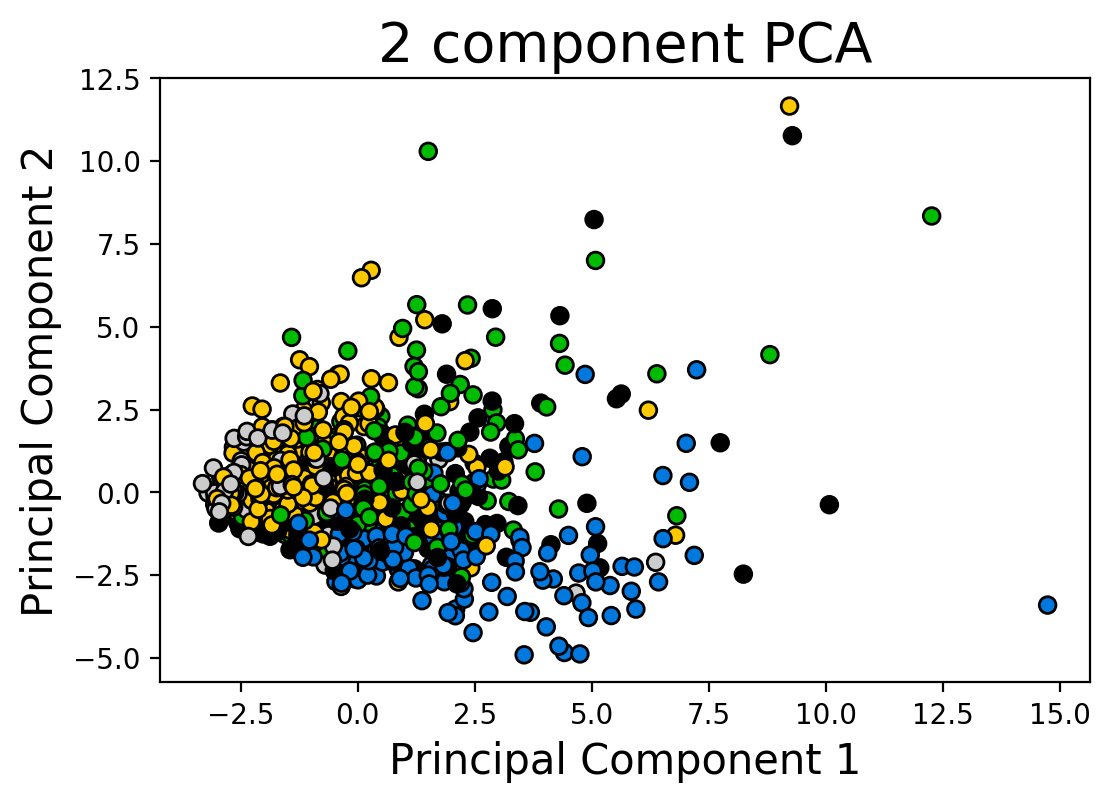

In [170]:
pc_df['classification'] = pc_df['classification'].astype('category')
colors = pc_df['classification'].cat.codes
fig, ax = plt.subplots(dpi=200)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(pc_df['pc1'], pc_df['pc2'], c=colors, cmap=plt.cm.nipy_spectral, edgecolor='k')

In [173]:
var = pca.explained_variance_ratio_
print('First component explains {}% of the variance'.format(var[0] * 100))
print('Second component explains {}% of the variance'.format(var[1] * 100))

First component explains 12.993521058414048% of the variance
Second component explains 7.821414725569332% of the variance


# Using mini batch K-means

In [26]:
from sklearn.cluster import MiniBatchKMeans

In [27]:
mini_kmeans = MiniBatchKMeans(n_clusters=5)

In [28]:
mini_kmeans = mini_kmeans.fit(X)

In [29]:
pred = mini_kmeans.predict(X)
out_df = pd.DataFrame({'label': pred})
out_df['label'].value_counts()

1    489
3    195
4    178
0     86
2     22
Name: label, dtype: int64

## Cluster 1

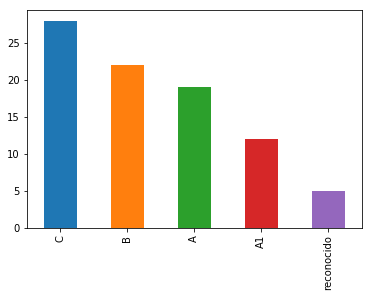

In [30]:
label_0 = out_df[out_df['label'] == 0]
label_0.index
df[df.index.isin(label_0.index)]['classification'].value_counts().plot.bar()

## Cluster 2

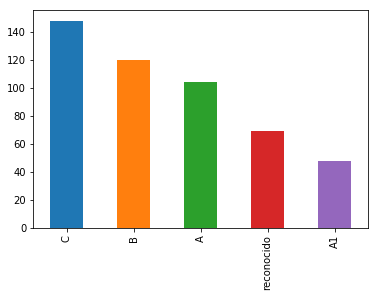

In [31]:
label_1 = out_df[out_df['label'] == 1]
label_1.index
df[df.index.isin(label_1.index)]['classification'].value_counts().plot.bar()

## Cluster 3

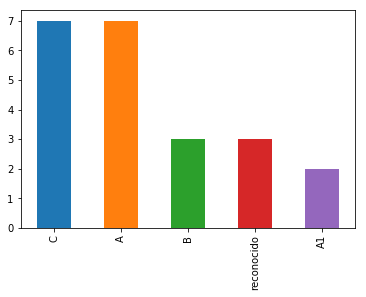

In [32]:
label_2 = out_df[out_df['label'] == 2]
label_2.index
df[df.index.isin(label_2.index)]['classification'].value_counts().plot.bar()

## Cluster 4

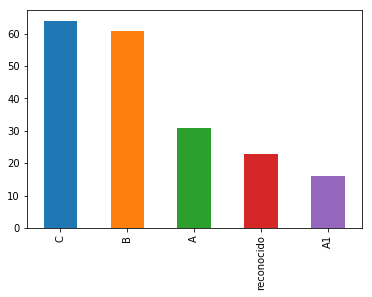

In [33]:
label_3 = out_df[out_df['label'] == 3]
label_3.index
df[df.index.isin(label_3.index)]['classification'].value_counts().plot.bar()

## Cluster 5

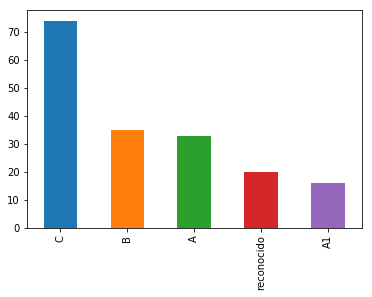

In [34]:
label_4 = out_df[out_df['label'] == 4]
label_4.index
df[df.index.isin(label_4.index)]['classification'].value_counts().plot.bar()

# Using T-SNE for visualize cluster

In [35]:
from sklearn.manifold import TSNE

In [36]:
model = TSNE(learning_rate=100, n_components=2)

In [39]:
transformed = model.fit_transform(X)

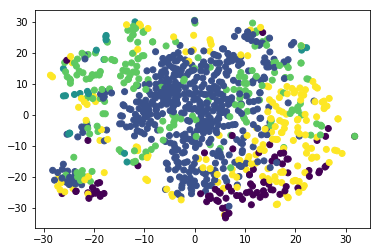

In [38]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed
plt.scatter(x_axis, y_axis, c=out_df['label'])